* Importing libraries

In [108]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

* we have Ames_Housing_Feature_Description.txt file, which contains the detailed description of each feature column(This file is referred for deeper understanding of data set and business domain

In [109]:
with open ('C:/Users/hchou/OneDrive/Desktop/Data Science/Projects/DATA/Ames_Housing_Feature_Description.txt','r') as f:
    print(f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

* Importing Data as df .

In [110]:
df=pd.read_csv('C:/Users/hchou/OneDrive/Desktop/Data Science/Projects/DATA/Ames_Housing_Data.csv')
df.head()     # Checking out the head of the dataframe 

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


* Lets's check out some basic information about the data set

In [111]:
df.info()           # our data has 80 columns and 2930 rows(data points)
                    # some columns has integer data type other have string datatype(objects)
                    # Seems like we do have some missing data in few columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2930 non-null   int64  
 1   MS SubClass      2930 non-null   int64  
 2   MS Zoning        2930 non-null   object 
 3   Lot Frontage     2440 non-null   float64
 4   Lot Area         2930 non-null   int64  
 5   Street           2930 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2930 non-null   object 
 8   Land Contour     2930 non-null   object 
 9   Utilities        2930 non-null   object 
 10  Lot Config       2930 non-null   object 
 11  Land Slope       2930 non-null   object 
 12  Neighborhood     2930 non-null   object 
 13  Condition 1      2930 non-null   object 
 14  Condition 2      2930 non-null   object 
 15  Bldg Type        2930 non-null   object 
 16  House Style      2930 non-null   object 
 17  Overall Qual  

* Lets create a function which will take a dataframe and will return the list of percentage of "Nan" data in each column

In [112]:
def Percentage_Missing(dataframe):                                 
    Nan_percentage=100*dataframe.isnull().sum()/len(dataframe)             
    Nan_percentage=Nan_percentage[Nan_percentage>0].sort_values()

    return Nan_percentage                                            

In [113]:
df_nan_percent=Percentage_Missing(df)

df_nan_percent

Electrical         0.034130
Garage Cars        0.034130
BsmtFin SF 1       0.034130
Garage Area        0.034130
BsmtFin SF 2       0.034130
Bsmt Unf SF        0.034130
Total Bsmt SF      0.034130
Bsmt Half Bath     0.068259
Bsmt Full Bath     0.068259
Mas Vnr Area       0.784983
Bsmt Qual          2.730375
Bsmt Cond          2.730375
BsmtFin Type 1     2.730375
BsmtFin Type 2     2.764505
Bsmt Exposure      2.832765
Garage Type        5.358362
Garage Qual        5.426621
Garage Cond        5.426621
Garage Yr Blt      5.426621
Garage Finish      5.426621
Lot Frontage      16.723549
Fireplace Qu      48.532423
Mas Vnr Type      60.580205
Fence             80.477816
Alley             93.242321
Misc Feature      96.382253
Pool QC           99.556314
dtype: float64

* Plotting Nan percenatge on graph

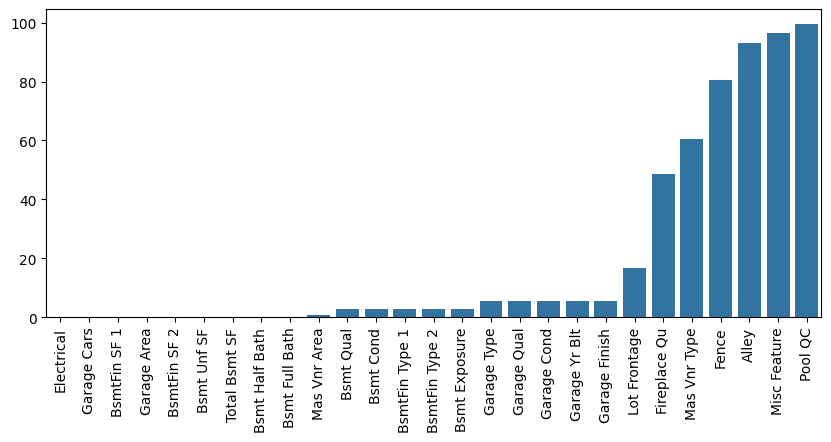

In [114]:
plt.figure(figsize=(10,4))

sns.barplot(df_nan_percent)
plt.xticks(rotation=90);

1. As we can see that NaN data for ['Electrical', 'Garage Cars', 'BsmtFin SF 1', 'Garage Area','BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Bsmt Half Bath','Bsmt Full Bath', 'Mas Vnr Area'] is less than 1%
2. And for columns ['Bsmt Qual', 'Bsmt Cond','BsmtFin Type 1', 'BsmtFin Type 2', 'Bsmt Exposure', 'Garage Type','Garage Qual']is between 2% to 5 %
3. and for ['Garage Cond', 'Garage Yr Blt', 'Garage Finish','Lot Frontage', 'Fireplace Qu', 'Mas Vnr Type', 'Fence', 'Alley','Misc Feature', 'Pool QC'] is very high

# Lets deal with columns with less than 1% nan values

In [115]:
df_nan_percent[df_nan_percent<1]

Electrical        0.034130
Garage Cars       0.034130
BsmtFin SF 1      0.034130
Garage Area       0.034130
BsmtFin SF 2      0.034130
Bsmt Unf SF       0.034130
Total Bsmt SF     0.034130
Bsmt Half Bath    0.068259
Bsmt Full Bath    0.068259
Mas Vnr Area      0.784983
dtype: float64

# Handling basement columns First

**Filling in data based on column names. There are 2 types of basement features, numerical and string descriptives.**

The numerical basement columns:

Based on the Description Text File, Assuming that Nan value for basement columns means that feature is not present in that property so we are replacing nan with 0 in numerical basement columns and with "None" in categorical basement feature.

In [116]:
bsmt_num_cols = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF','Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath']
df[bsmt_num_cols]=df[bsmt_num_cols].fillna(0)

In [117]:
bsmt_str_cols =  ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']
df[bsmt_str_cols] = df[bsmt_str_cols].fillna('None')

* Similarly filling for Garange cars.

In [118]:
df['Garage Cars']=df['Garage Cars'].fillna(0)

Since 'Electrical' column has only 1 row missing that data, we can drop that row

In [119]:
df=df.dropna(axis=0,subset=['Electrical'])

Only one row was missing "Garage area" and that row has 1 no. of garage cars , so we filled the "Garage area" with the mean of data where Garage cars==1

In [120]:
df['Garage Area']=df.groupby('Garage Cars')['Garage Area'].transform(lambda x:x.fillna(x.mean()))

# Mas Vnr Feature 
Based on the Description Text File, Mas Vnr Type and Mas Vnr Area being missing (NaN) is likely to mean the house simply just doesn't have a masonry veneer, in which case, we will fill in this data as we did before.

In [121]:
df['Mas Vnr Area']=df['Mas Vnr Area'].fillna(0)
df['Mas Vnr Type']=df['Mas Vnr Type'].fillna('None')

* Re-checking our data set for remaining Nan values in columns

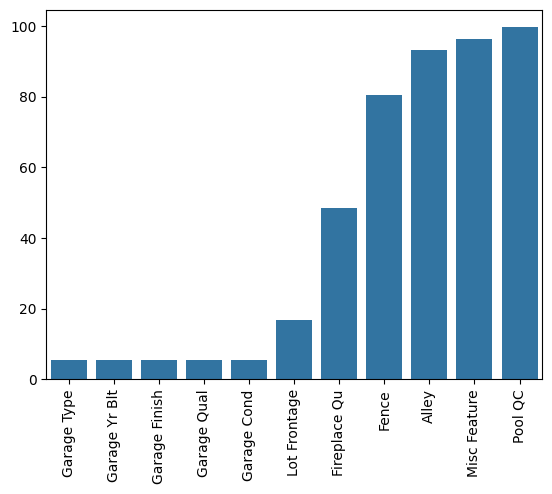

In [122]:
sns.barplot(Percentage_Missing(df))
plt.xticks(rotation=90);

In [123]:
Percentage_Missing(df)

Garage Type       5.360191
Garage Yr Blt     5.428474
Garage Finish     5.428474
Garage Qual       5.428474
Garage Cond       5.428474
Lot Frontage     16.729259
Fireplace Qu     48.514851
Fence            80.471151
Alley            93.240014
Misc Feature     96.381017
Pool QC          99.556163
dtype: float64

# Filling In Missing Column Data

Our previous approaches were based more on rows missing data, now we will take an approach based on the column features themselves, since larger percentages of the data appears to be missing.

### Garage Columns

Based on the data description, these NaN seem to indicate no garage, so we will substitute with "None" or 0.

In [124]:
df[['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']]

,Garage Type,Garage Finish,Garage Qual,Garage Cond
0,Attchd,Fin,TA,TA
1,Attchd,Unf,TA,TA
2,Attchd,Unf,TA,TA
3,Attchd,Fin,TA,TA
4,Attchd,Fin,TA,TA
...,...,...,...,...
2925,Detchd,Unf,TA,TA
2926,Attchd,Unf,TA,TA
2927,NaN,NaN,NaN,NaN
2928,Attchd,RFn,TA,TA


In [125]:
gar_str_cols = ['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']
df[gar_str_cols] = df[gar_str_cols].fillna('None')

In [126]:
df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(0)

In [127]:
Percentage_Missing(df)

Lot Frontage    16.729259
Fireplace Qu    48.514851
Fence           80.471151
Alley           93.240014
Misc Feature    96.381017
Pool QC         99.556163
dtype: float64

# Lets Handle columns which are missing large chunck of data

In [128]:
Percentage_Missing(df)

Lot Frontage    16.729259
Fireplace Qu    48.514851
Fence           80.471151
Alley           93.240014
Misc Feature    96.381017
Pool QC         99.556163
dtype: float64

In [129]:
df.drop(['Lot Frontage','Fireplace Qu', 'Fence', 'Alley', 'Misc Feature','Pool QC'],axis=1,inplace=True)

In [130]:
Percentage_Missing(df)

Series([], dtype: float64)

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2929 entries, 0 to 2929
Data columns (total 75 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2929 non-null   int64  
 1   MS SubClass      2929 non-null   int64  
 2   MS Zoning        2929 non-null   object 
 3   Lot Area         2929 non-null   int64  
 4   Street           2929 non-null   object 
 5   Lot Shape        2929 non-null   object 
 6   Land Contour     2929 non-null   object 
 7   Utilities        2929 non-null   object 
 8   Lot Config       2929 non-null   object 
 9   Land Slope       2929 non-null   object 
 10  Neighborhood     2929 non-null   object 
 11  Condition 1      2929 non-null   object 
 12  Condition 2      2929 non-null   object 
 13  Bldg Type        2929 non-null   object 
 14  House Style      2929 non-null   object 
 15  Overall Qual     2929 non-null   int64  
 16  Overall Cond     2929 non-null   int64  
 17  Year Built       29

** We have removed all the Nan values from our dataset , Now lets look at our dataset

** Later on we will take on more refined approch to handle the missing data of these columns and will compare the performace of our model